# 2021 Xarray User Survey Results

This notebook presents the results of the 2021 Xarray User Survey, which ran in January 2021. Thanks to everyone who took the time to fill out the survey! These results help us better understand the Xarray community and will guide future development efforts.

The raw data, as well as this notebook, can be found in this binder:

[badge...]()

Let us know if you find anything in the data.

## Highlights
We had 289 responses to the survey.

- more
- highlights
- here

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [2]:
df = pd.read_csv('./2021-01.csv')
# df.head()

In [3]:
n_participants = len(df)
n_participants

288

In [4]:
import numpy as np
import xarray as xr

In [5]:
def split_entries(series):
    split = series.str.split(", ", expand=True)
    stacked = split.stack()
    return stacked.droplevel(level=1)

## role and job title

Multiple choices are possible.

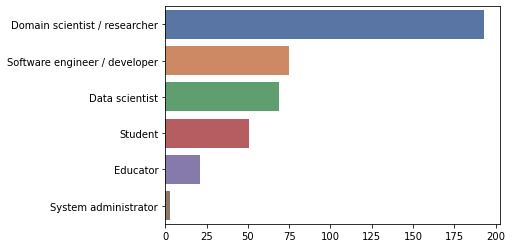

In [6]:
data = df['What is the job title that best describes your role when using Xarray?']

prepared = split_entries(data)
counts = prepared.to_frame(name="roles").value_counts()
filtered = counts[counts > 1].reset_index(name="counts")

ax = sns.barplot(y="roles", x="counts", data=filtered, palette="deep")
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)

## field of work

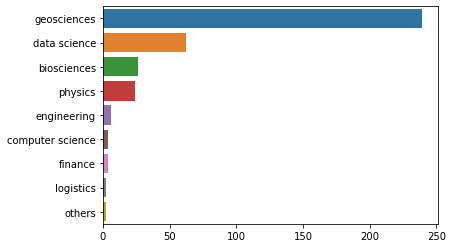

In [7]:
data = df['What field do you work in?']
categories = {
    "physics": (
        "astrophysics",
        "physics",
        "fluid mechanic",
        "fluid mechanics",
        "turbulence",
        "plasma physics",
        "thermodynamics",
        "material science",
        "materials science",
        "optical fluid flow measurements",
        "medical physics",
        "microscopy",
    ),
    "geosciences": (
        "geosciences",
        "climate science and meteorology",
        "meteorology",
        "climate science",
        "earth sciences",
        "oceanography",
        "climatology",
    ),
    "data science": ("statistics", "statistics & machine learning", "mathematics"),
    "biosciences": ("biosciences", "neuroscience"),
    "computer science": (
        "computing",
        "semiconductors",
        "electrical engineering",
        "electrical & computer engineering",
    ),
    "engineering": ("civil engineering", "energy", "renewable energy", "wind energy"),
    "logistics": ("logistics", "air traffic management research"),
    "others": ("sports analytics", "political science"),
}
def categorize(data, categories):
    data = data.lower().strip()
    for category, fields in categories.items():
        if data in fields:
            return category
    return data

split = split_entries(data)
categorized = split.map(lambda data: categorize(data, categories)).astype("category")
counts = categorized.value_counts()
filtered = counts[counts > 1].to_frame(name="counts").reset_index()

ax = sns.barplot(x="counts", y="index", data=filtered, order=filtered["index"])
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)

# TODO: while interesting use cases, there are a few with very few answers

## use of xarray

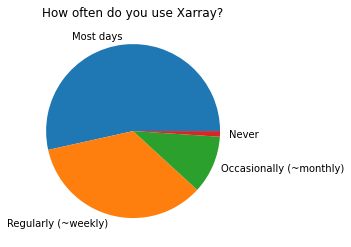

In [8]:
data = df['How often do you use Xarray?']
_ = data.value_counts().plot.pie(ylabel="", title=data.name)

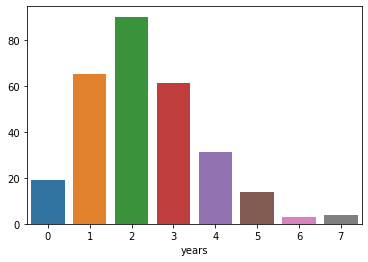

In [9]:
data = df['How many years have you been using Xarray?']

cleaned = data.dropna().astype(int)
counts = cleaned.value_counts().sort_index()

prepared = counts.rename_axis(index=["years"]).to_frame(name="counts").reset_index()
ax = sns.barplot(x="years", y="counts", data=prepared)
_ = ax.set_ylabel(None)

## xarray proficiency

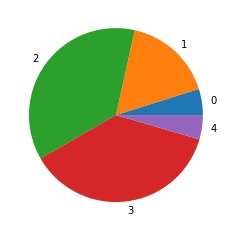

In [10]:
data = df['How do you rate your level of Xarray proficiency?']
ax = data.value_counts().sort_index().plot.pie()
_ = ax.set_ylabel(None)

## how critical is xarray?

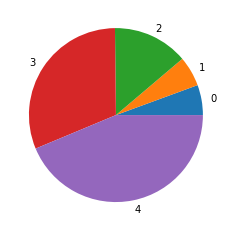

In [11]:
data = df['For your applications that use Xarray, how critical is Xarray?']
ax = data.dropna().astype(int).value_counts().sort_index().plot.pie()
_ = ax.set_ylabel(None)

## is xarray stable enough?

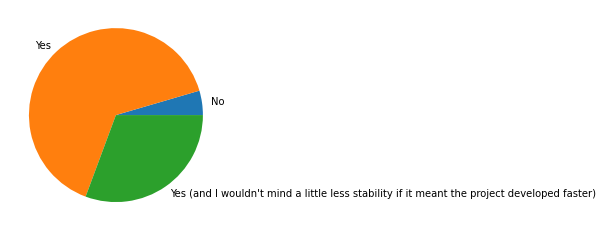

In [12]:
ax = df['Is Xarray stable enough for you?'].value_counts().sort_index().plot.pie()
_ = ax.set_ylabel(None)

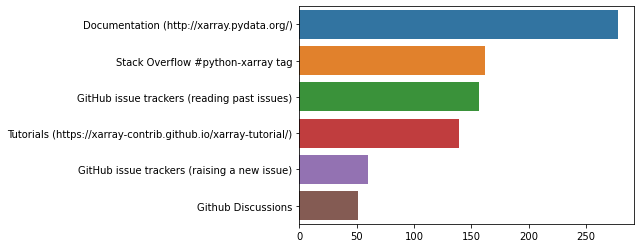

In [13]:
# TODO, split multiple entries, group like entries
data = df['What Xarray resources have you used for support in the last six months?']
split = split_entries(data)
counts = split.value_counts().rename_axis(index="resources").reset_index(name="counts")
ax = sns.barplot(x="counts", y="resources", data=counts)
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)

## most important xarray core features

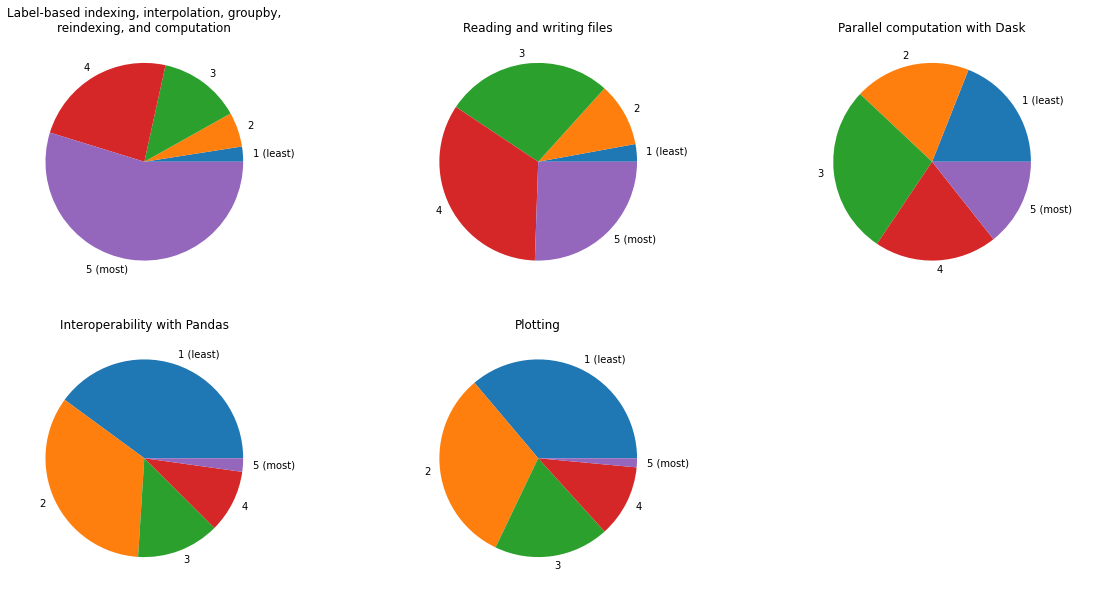

In [14]:
prefix = "Which of Xarray's core features are most important to you?"
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    s.value_counts().sort_index().plot.pie(ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
_ = axes[:][-1, -1].axis("off")

## hardware used to run xarray

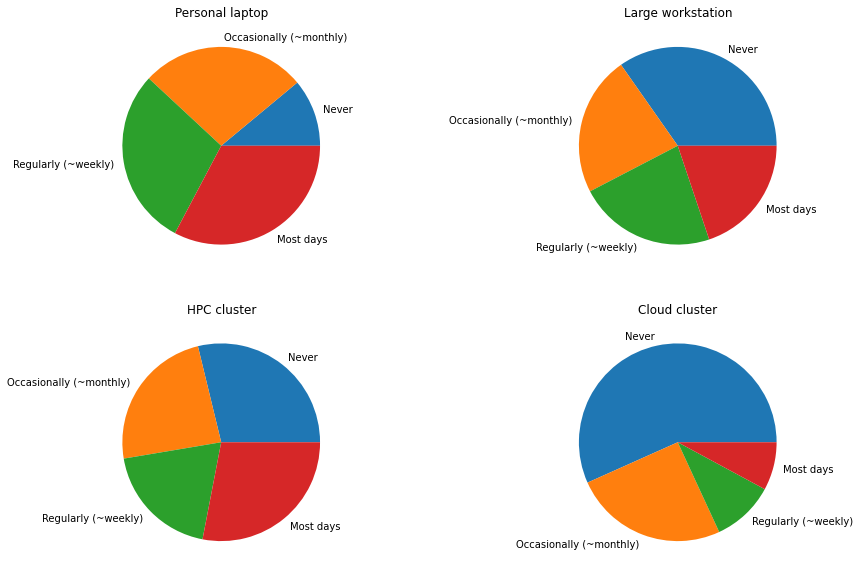

In [15]:
prefix = "Where do you use Xarray?"
order = ['Never', 'Occasionally (~monthly)', 'Regularly (~weekly)', 'Most days']

df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    s.value_counts().reindex(order).plot.pie(ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)

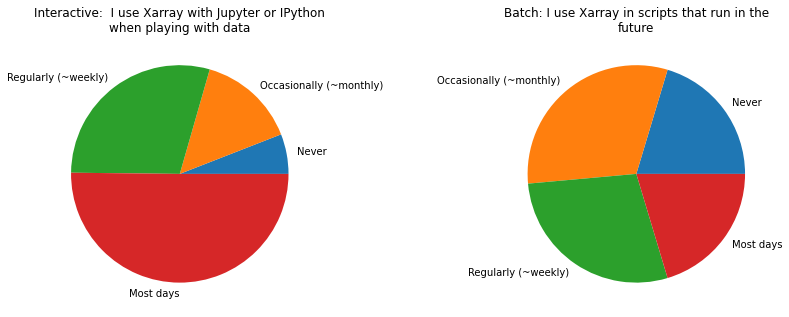

In [16]:
prefix = "Interactive or batch?"

df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    s.value_counts().reindex(order).plot.pie(ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)

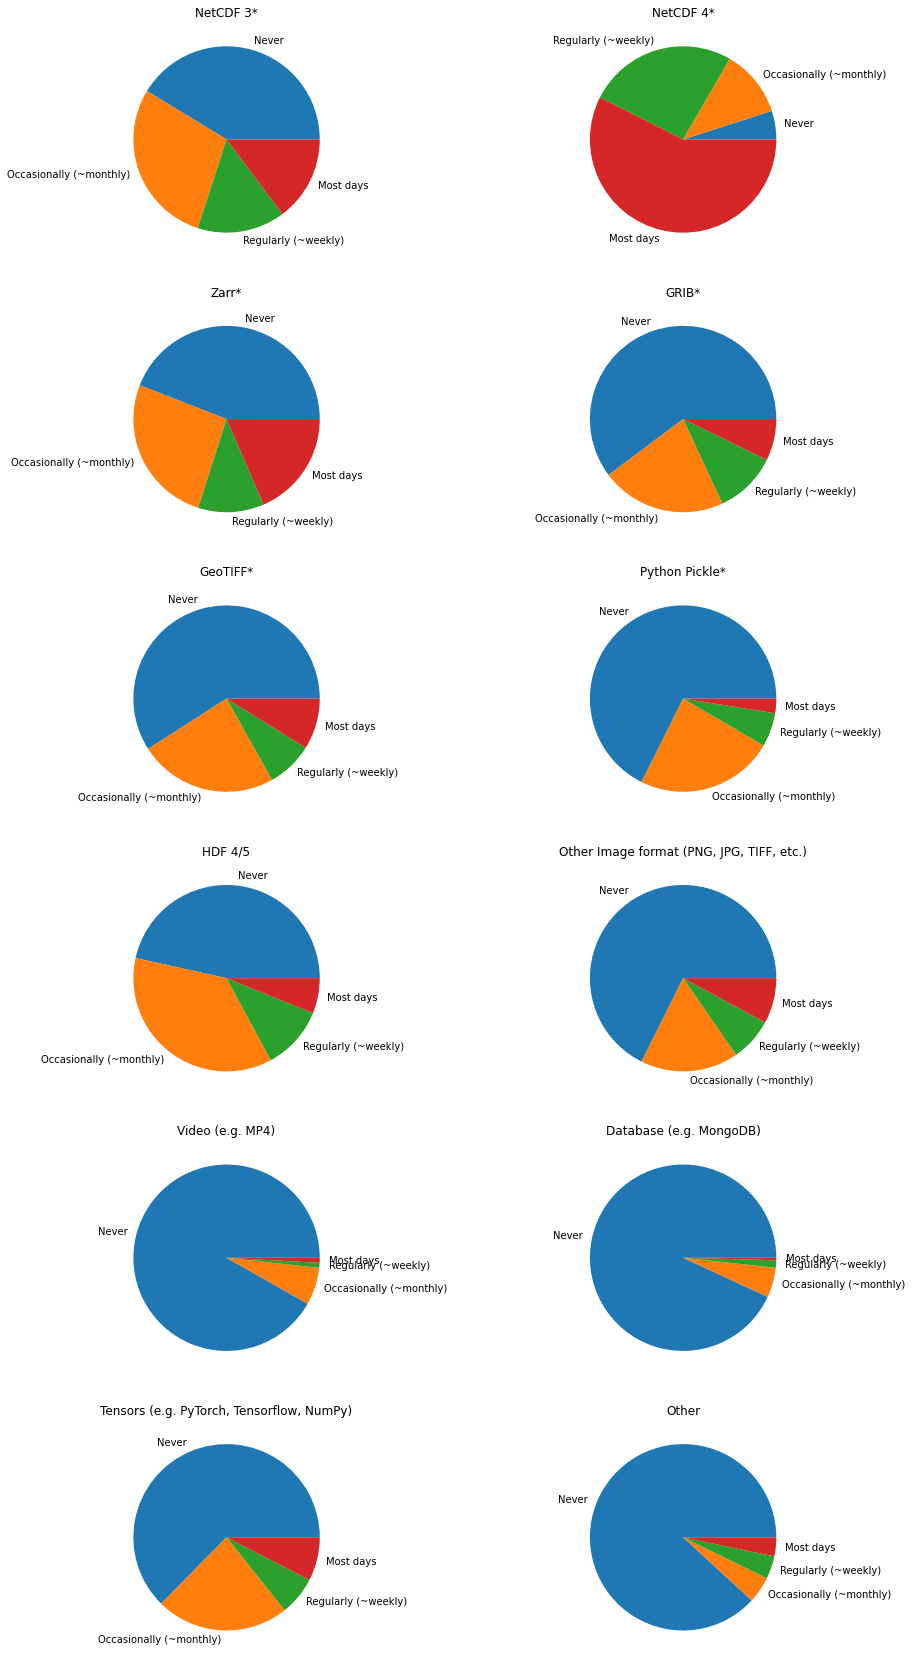

In [17]:
prefix = 'Xarray includes support for reading and writing a number of multi-dimensional data storage formats. Which do you use?'
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(6, 2, figsize=(15, 30))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    s.value_counts().reindex(order).plot.pie(ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)

In [18]:
uses_other = df['Xarray includes support for reading and writing a number of multi-dimensional data storage formats. Which do you use? [Other]'].dropna()
uses_other = uses_other[uses_other != 'Never']
other_formats = df['If you answered "Other" above, please list any additional formats:'].reindex(uses_other.index).dropna()
print("Other formats:", *other_formats.to_list(), sep="\n — ")

Other formats:
 — annoying NASA binary formats
 — CSV
 — Text
 — OPeNDAP, CDMRemote (using custom backend)
 — TileDB
 — custom format
 — Feather, CSV
 — Model specific binary data
 — binary
 — ascii file data
 — OpenDap links
 — Text - for BibTeX & JSON & CSV
 — CDF (via cdflib)
 — Mitgcm binary files (supported through xmitgcm)
 — csv 
 — csv 
 — FITS
 — Raw binary


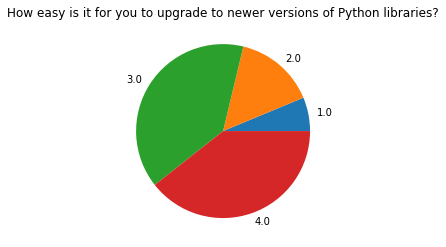

In [19]:
data = df['How easy is it for you to upgrade to newer versions of Python libraries?']

prepared = data.value_counts().sort_index()
ax = prepared.plot.pie()
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)
_ = ax.set_title(data.name)

## other libraries used with xarray

In [20]:
from collections import defaultdict

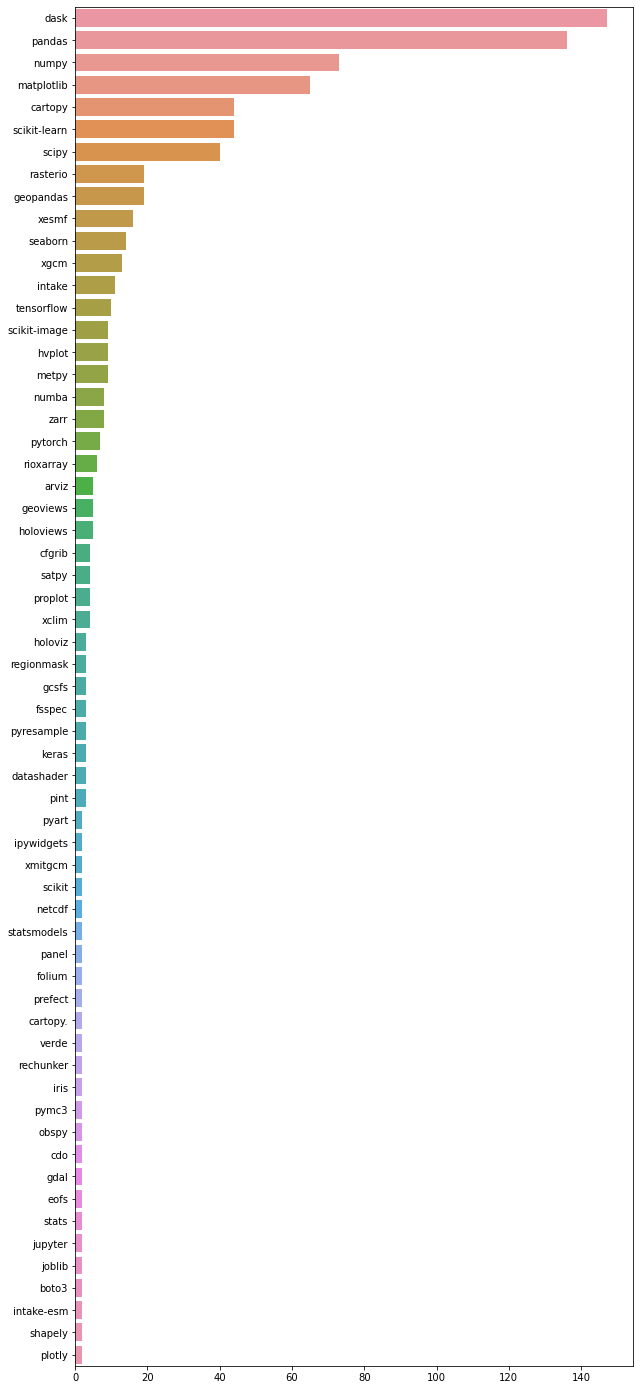

In [21]:
data = df['What are some other libraries that you often use with Xarray? (e.g. "dask, pandas, scikit-learn") ']

preprocessed = (
    data.str.lower().str.replace(r",(?=[^\s])", ", ", regex=True)
    .pipe(split_entries)
    .str.strip("()")
    .str.strip()
)
counts = preprocessed.value_counts()
filtered = counts[counts > 1].rename_axis(index="libraries").reset_index(name="counts")
filtered = filtered[filtered.libraries != ""]

fig = plt.figure(figsize=(10, 25))
ax = fig.gca()
sns.barplot(x="counts", y="libraries", data=filtered, ax=ax)
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)

# should we reduce the number of libraries, e.g. by increasing the minimum number of votes?

## most helpful development activities

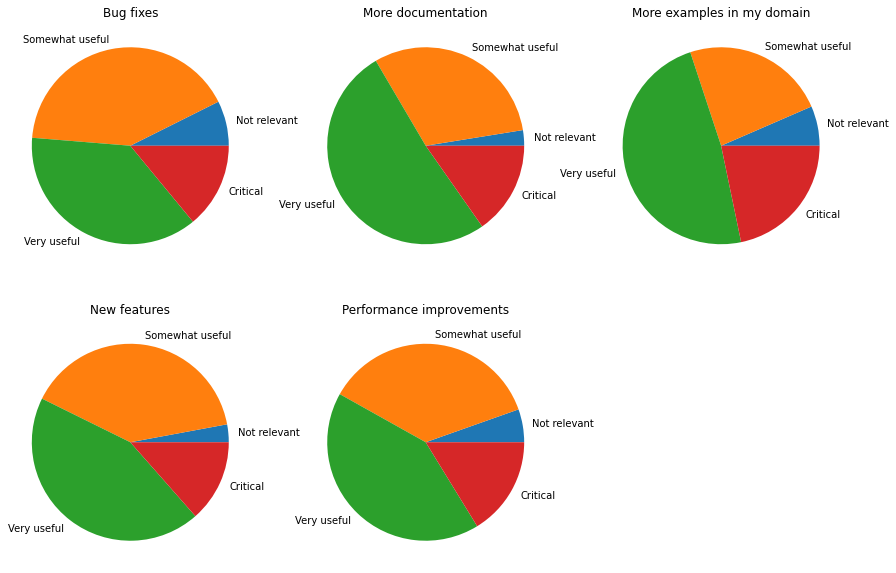

In [22]:
prefix = 'What development activities would help you most right now?'
order = ['Not relevant', 'Somewhat useful', 'Very useful', 'Critical']
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    s.value_counts().reindex(order).plot.pie(ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
_ = axes[-1, -1].axis("off")

## most important common feature request

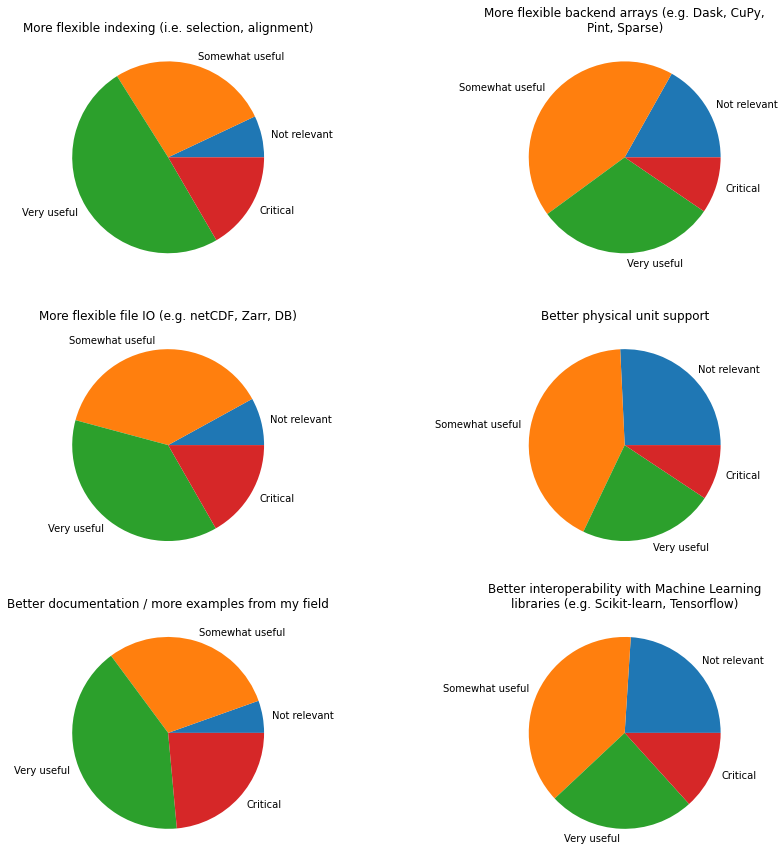

In [23]:
prefix = 'What common feature requests do you care about most?'
order = ['Not relevant', 'Somewhat useful', 'Very useful', 'Critical']
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    s.value_counts().reindex(order).plot.pie(ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)

## backend array types

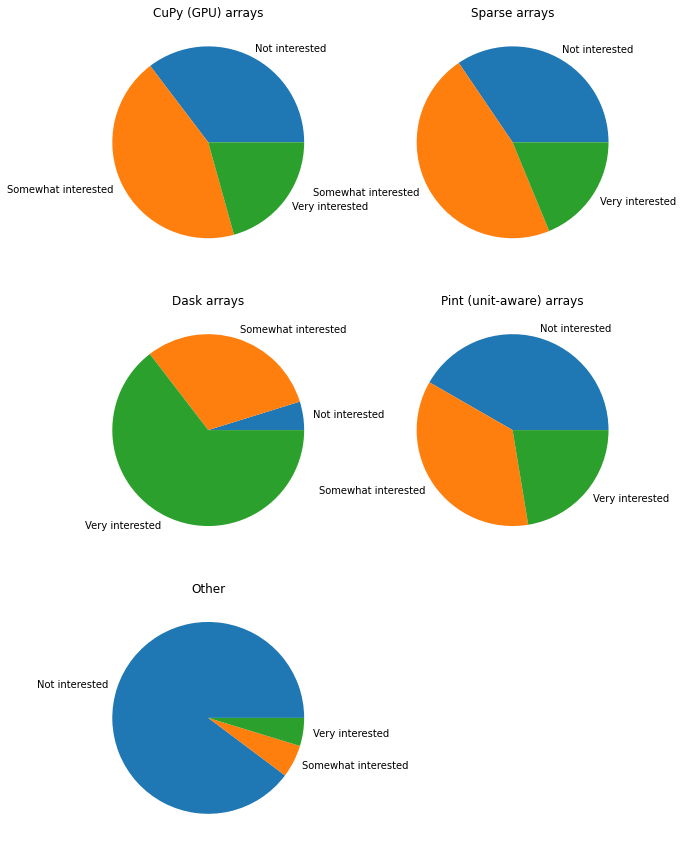

In [24]:
prefix = 'Xarray supports multiple backend array types'
order = ['Not interested', 'Somewhat interested', 'Very interested']
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    s.value_counts().reindex(order).plot.pie(ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[k.find("["):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
_ = axes[-1, -1].axis("off")

In [25]:
uses_other = df['Xarray supports multiple backend array types (e.g. NumPy and Dask). Rank your interest non-NumPy backend array support: [Other]'].dropna()
uses_other = uses_other[uses_other != 'Never']
other = df['If you answered "Other" above, list any additional array types:'].reindex(uses_other.index).dropna()

print("Other array types:", *other.to_list(), sep="\n – ")

Other array types:
 – Video frames
 – Potentiality other number systems like posets?
 – awkward-arrays
 – Jax
 – Using units from astropy (import astropy.units).
 – grib2
 – unyt backed arrays; Pint can be fairly slow
 – Jax
 – Point cloud data sets
 – point cloud dataset (e.g.: LAS)
 – Numpy Memmap !  Especially when opening a ZarrStore


## improvements to the docs

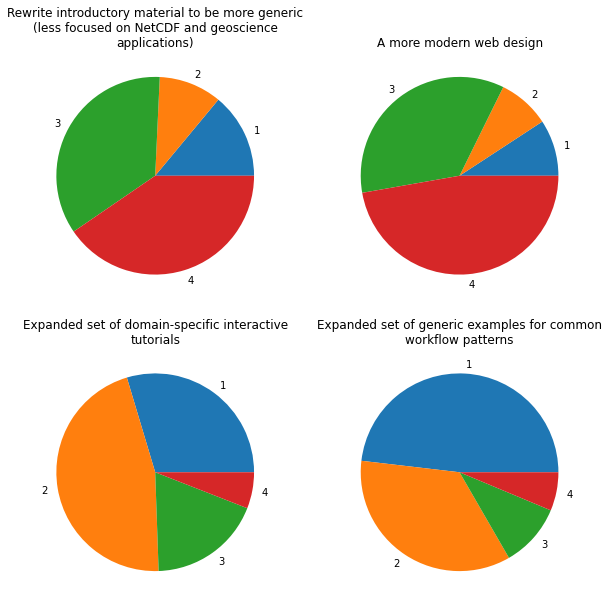

In [26]:
prefix = "Xarray's documentation is due for a makeover. Rank the following set of possible changes based on your personal preferences:"
df_q = df.filter(regex=f'^{prefix}', axis=1)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    data = s.str.replace(r"\([^)]+\)", "", regex=True).str.strip().dropna().value_counts()
    data.sort_index().plot.pie(ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[k.find("["):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)